# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

Форма для сдачи будет опубликована позднее.

### Пожалуйста, не производите никаких манипуляций с  переменной `_dict_for_submission` и с ячейками, в которых она используется. На ее основе будет сгенерирован итоговый файл для сдачи задания.

In [1]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission = dict()


def transform_list(list_of_ints):
    return [str(x) for x in list_of_ints]
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 1. Небольшой numpy-разогрев. (10%)

In [2]:
import numpy as np
import pandas as pd

In [4]:
# Создайте матрицу A размерами 10 на 10 из упорядоченных целых чисел от 0 до 100
# hint: np.arange(100).reshape((10, 10))

A = np.arange(100).reshape((10, 10))

In [5]:
# Посчитайте средние значения в матрице по столбцам

[np.average(A[:, i]) for i in range(np.size(A, 1))]

[45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0]

In [6]:
# Транспонируйте матрицу A

A.T

array([[ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
       [ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91],
       [ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92],
       [ 3, 13, 23, 33, 43, 53, 63, 73, 83, 93],
       [ 4, 14, 24, 34, 44, 54, 64, 74, 84, 94],
       [ 5, 15, 25, 35, 45, 55, 65, 75, 85, 95],
       [ 6, 16, 26, 36, 46, 56, 66, 76, 86, 96],
       [ 7, 17, 27, 37, 47, 57, 67, 77, 87, 97],
       [ 8, 18, 28, 38, 48, 58, 68, 78, 88, 98],
       [ 9, 19, 29, 39, 49, 59, 69, 79, 89, 99]])

In [7]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

np.multiply(A, np.transpose(A))

array([[   0,   10,   40,   90,  160,  250,  360,  490,  640,  810],
       [  10,  121,  252,  403,  574,  765,  976, 1207, 1458, 1729],
       [  40,  252,  484,  736, 1008, 1300, 1612, 1944, 2296, 2668],
       [  90,  403,  736, 1089, 1462, 1855, 2268, 2701, 3154, 3627],
       [ 160,  574, 1008, 1462, 1936, 2430, 2944, 3478, 4032, 4606],
       [ 250,  765, 1300, 1855, 2430, 3025, 3640, 4275, 4930, 5605],
       [ 360,  976, 1612, 2268, 2944, 3640, 4356, 5092, 5848, 6624],
       [ 490, 1207, 1944, 2701, 3478, 4275, 5092, 5929, 6786, 7663],
       [ 640, 1458, 2296, 3154, 4032, 4930, 5848, 6786, 7744, 8722],
       [ 810, 1729, 2668, 3627, 4606, 5605, 6624, 7663, 8722, 9801]])

In [8]:
# Посчитайте matrix product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Matrix_multiplication
# or https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

B = A @ A
B

array([[ 2850,  2895,  2940,  2985,  3030,  3075,  3120,  3165,  3210,
         3255],
       [ 7350,  7495,  7640,  7785,  7930,  8075,  8220,  8365,  8510,
         8655],
       [11850, 12095, 12340, 12585, 12830, 13075, 13320, 13565, 13810,
        14055],
       [16350, 16695, 17040, 17385, 17730, 18075, 18420, 18765, 19110,
        19455],
       [20850, 21295, 21740, 22185, 22630, 23075, 23520, 23965, 24410,
        24855],
       [25350, 25895, 26440, 26985, 27530, 28075, 28620, 29165, 29710,
        30255],
       [29850, 30495, 31140, 31785, 32430, 33075, 33720, 34365, 35010,
        35655],
       [34350, 35095, 35840, 36585, 37330, 38075, 38820, 39565, 40310,
        41055],
       [38850, 39695, 40540, 41385, 42230, 43075, 43920, 44765, 45610,
        46455],
       [43350, 44295, 45240, 46185, 47130, 48075, 49020, 49965, 50910,
        51855]])

#### Не меняйте следующую ячейку. Просто запустите ее.

In [9]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['B'] = transform_list(list(B.flatten()))
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [10]:
import pandas as pd

In [ ]:
# If on colab, uncomment the following lines

# !wget "https://downloader.disk.yandex.com/disk/cd3ead013809a9da37434c792796d4b063dfc89571c68c273ca3788013b82bf8/5d865a2d/8bfV6Unxao6CYWcER5-G5fza25GZaFjE_xFvc0-ExCwlqmFjBf2bynRfBnL6ubJC8XhsoYHi7h9Nu6gfvS8wxg%3D%3D?uid=76549735&filename=forest_dataset.csv&disposition=attachment&hash=&limit=0&content_type=application%2Fvnd.ms-excel&owner_uid=76549735&fsize=1293856&hid=9b439c18e67923b45c3b3d8891bdf9ab&media_type=spreadsheet&tknv=v2&etag=45e530aa3c9796cb705d4e27be7a6e9c" -O forest_dataset.csv

In [11]:
all_data = pd.read_csv('forest_dataset.csv')

Выделим 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей (до конца ноутбука она более не используется), в `all_data` поместим оставшиеся 80%. Не будем перемешивать данные сознательно (для удобства проверки).

In [12]:
delayed_data = all_data[int(0.8 * len(all_data)):]
all_data = all_data[:int(0.8 * len(all_data))]

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [13]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_feature_matrix = delayed_data[delayed_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [14]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [15]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [16]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix, two_class_labels, test_size=0.2)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [17]:
lr_clf = LogisticRegression()

In [18]:
# логистическая регрессия требует нормировки данных
from sklearn.preprocessing import StandardScaler

train_scaler = StandardScaler()
train_scaler.fit(train_feature_matrix)
scalled_train_feature_matrix = train_scaler.transform(train_feature_matrix)

test_scaler = StandardScaler()
test_scaler.fit(test_feature_matrix)
scalled_test_feature_matrix = test_scaler.transform(test_feature_matrix)

In [19]:
lr_clf.fit(scalled_train_feature_matrix, train_labels)
lr_predict = lr_clf.predict(scalled_test_feature_matrix)

In [20]:
prediction_correctness = np.asarray([int(predicted == actual) for predicted, actual in zip(lr_predict, test_labels)])
accuracy = (prediction_correctness @ prediction_correctness.T) / len(prediction_correctness)
accuracy

0.7682215743440233

In [21]:
import sklearn.metrics as mes

print(f'Accuracy={mes.accuracy_score(lr_predict, test_labels)}')
print(f'F1={mes.f1_score(lr_predict, test_labels)}')

Accuracy=0.7682215743440233
F1=0.7268041237113403


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [22]:
lr_clf = LogisticRegression(solver="saga", multi_class='multinomial', max_iter=3000, tol=0.01)

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)

С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [23]:
from sklearn.model_selection import GridSearchCV

train_scaler = StandardScaler()
train_scaler.fit(train_feature_matrix)
scalled_train_feature_matrix = train_scaler.transform(train_feature_matrix)

param_to_learn = {'C':np.linspace(0.01, 1, 10), 'penalty': ['l1', 'l2']}
clf = GridSearchCV(lr_clf, scoring='accuracy', cv=5, param_grid=param_to_learn)
clf.fit(scalled_train_feature_matrix, train_labels)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=3000,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.01),
             param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

In [24]:
scores_mean = clf.cv_results_['mean_test_score']
scores_mean = np.array(scores_mean).reshape(len(param_to_learn['C']),len(param_to_learn['penalty']))
scores_mean

array([[0.69171875, 0.700625  ],
       [0.71125   , 0.71296875],
       [0.7128125 , 0.71203125],
       [0.7128125 , 0.71203125],
       [0.7125    , 0.71234375],
       [0.7128125 , 0.71265625],
       [0.7125    , 0.71265625],
       [0.7121875 , 0.7128125 ],
       [0.71234375, 0.71265625],
       [0.7125    , 0.7125    ]])

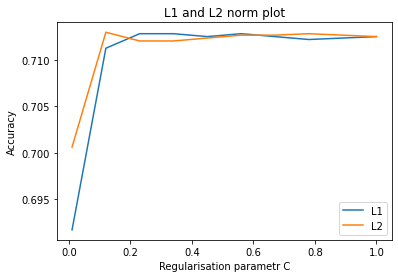

In [25]:
from matplotlib import pyplot as plt

plt.title("L1 and L2 norm plot")
plt.xlabel("Regularisation parametr C")
plt.ylabel("Accuracy")
plt.plot([elem["C"] for elem in clf.cv_results_["params"][::2]], clf.cv_results_["mean_test_score"][::2], label="L1")
plt.plot([elem["C"] for elem in clf.cv_results_["params"][1::2]], clf.cv_results_["mean_test_score"][1::2], label="L2")
plt.legend(loc="lower right")
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [26]:
print(f'Optimal value = {clf.best_params_}')

Optimal value = {'C': 0.12, 'penalty': 'l2'}


In [27]:
# другой способ
print(f'Optimal value = {clf.cv_results_["params"][np.argmax(clf.cv_results_["mean_test_score"])]}')

Optimal value = {'C': 0.12, 'penalty': 'l2'}


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [28]:
scaler = StandardScaler()
scaler.fit(test_feature_matrix)
scalled_test_feature_matrix = train_scaler.transform(test_feature_matrix)

test_predicted = clf.best_estimator_.predict_proba(scalled_test_feature_matrix)
print(accuracy_score(clf.best_estimator_.predict(scalled_test_feature_matrix), test_labels))

0.7175


Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [29]:
predicted = clf.best_estimator_.predict_proba(scalled_test_feature_matrix)
for i in range(7):
    print(np.average(predicted.T[i]), end="\t")
    print(np.size(test_labels[test_labels == i + 1], 0) / np.size(test_labels, 0))

0.3677974932921513	0.378125
0.48255915749144296	0.478125
0.06566730080261302	0.06625
0.008810655404084662	0.004375
0.01685716695935243	0.01375
0.02995254508110296	0.03
0.028355680969252797	0.029375


#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [30]:
from sklearn.neighbors import KNeighborsClassifier

k_clf = KNeighborsClassifier()
k_clf.fit(scalled_train_feature_matrix, train_labels)

print(accuracy_score(test_labels, k_clf.predict(scalled_test_feature_matrix)))

0.725


Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [31]:
k_clf = KNeighborsClassifier(weights="uniform")
k_clf.fit(scalled_train_feature_matrix, train_labels)
print("Accuracy for uniform weights = \t\t %s"%(accuracy_score(test_labels, k_clf.predict(scalled_test_feature_matrix))))

k_clf = KNeighborsClassifier(weights="distance")
k_clf.fit(scalled_train_feature_matrix, train_labels)
print("Accuracy for distance weights = \t %s"%(accuracy_score(test_labels, k_clf.predict(scalled_test_feature_matrix))))

Accuracy for uniform weights = 		 0.725
Accuracy for distance weights = 	 0.738125


Best n_neighbors: 6


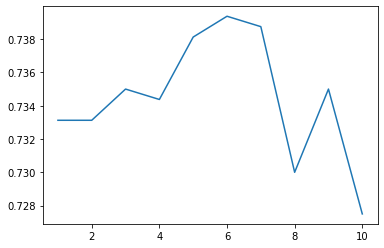

In [39]:
def get_accuracy(n_neighbors):
    k_clf = KNeighborsClassifier(n_neighbors=n_neighbors, weights="distance")
    k_clf.fit(scalled_train_feature_matrix, train_labels)
    return accuracy_score(test_labels, k_clf.predict(scalled_test_feature_matrix))


indicies = [i + 1 for i in range(10)]
accuracies = [get_accuracy(i) for i in indicies]

from matplotlib import pyplot as plt
plt.plot(indicies, accuracies)
print(f'Best n_neighbors: {np.argmax(accuracies) + 1}')
plt.show()

Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [40]:
k_clf = KNeighborsClassifier(n_neighbors=6, weights="distance")
k_clf.fit(scalled_train_feature_matrix, train_labels)
k_clf.predict_proba(scalled_test_feature_matrix)

array([[0.82078436, 0.17921564, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.87162401, 0.12837599, ..., 0.        , 0.        ,
        0.        ],
       [0.84729505, 0.15270495, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43765227, 0.56234773, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.48160727, 0.51839273, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

Создайте объект `best_knn_clf`, который представляет собой лучший классификатор.

In [46]:
best_knn_clf = KNeighborsClassifier(n_neighbors=6, weights='distance')
best_lr_clf = LogisticRegression(solver="saga", multi_class='multinomial', max_iter=3000, tol=0.01, C=0.12, penalty='l2')

_ = best_knn_clf.fit(scalled_train_feature_matrix, train_labels)
_ = best_lr_clf.fit(scalled_train_feature_matrix, train_labels)

In [43]:
#delayed_labels
#delayed_feature_matrix

In [51]:
scaler = StandardScaler()
scaler.fit(delayed_feature_matrix)
scalled_delayed_feature_matrix = train_scaler.transform(delayed_feature_matrix)


print("kNN accuracy = \t\t %s"%(accuracy_score(delayed_labels, best_knn_clf.predict(scalled_delayed_feature_matrix))))
print("LogReg Accuracy = \t %s"%(accuracy_score(delayed_labels, best_lr_clf.predict(scalled_delayed_feature_matrix))))

kNN accuracy = 		 0.7335
LogReg Accuracy = 	 0.712


#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии `best_lr_clf` и лучшего kNN `best_knn_clf` на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [ ]:
# Ваш код здесь

#### Не меняйте следующую ячейку. Запустите ее для генерации `submission` файла.

In [ ]:
# Do not change me, just run
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
_dict_for_submission['best_lr_clf_delayed'] = transform_list(list(best_lr_clf.predict(delayed_feature_matrix)))
_dict_for_submission['best_knn_clf_delayed'] = transform_list(list(best_knn_clf.predict(delayed_feature_matrix)))

import json
with open('submission_hw1_basic.json', 'w') as iofile:
    json.dump(_dict_for_submission, iofile)
# !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

Данный файл необходимо будет прикрепить к Google-форме для сдачи домашнего задания. __Для идентификации используется e-mail, который вы указали при регистрации на курс. Проверка производится автоматически. Если вы подпишитесь другим e-mail'ом, задание просто не будет засчитано.__

На этом задание завершено. Мы будем рады, если вы оставите обратную связь по данному заданию [по ссылке](https://forms.gle/2qaf14ky3J6HZfe48). Она анонимна ;)